In [1046]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1047]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Task 1

### 1.a Splitting to train and test

In [1048]:
df1 = pd.read_csv('class_1.csv', header=None)
df2 = pd.read_csv('class_2.csv', header=None)
df3 = pd.read_csv('class_3.csv', header=None)

feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df1.columns = feature_names
df2.columns = feature_names
df3.columns = feature_names

classes = np.transpose([1, 2, 3])

df1['class'] = 1
df2['class'] = 2
df3['class'] = 3

train_df = pd.concat([df1.iloc[:30], df2.iloc[:30], df3.iloc[:30]], ignore_index=True)
test_df = pd.concat([df1.iloc[-20:], df2.iloc[-20:], df3.iloc[-20:]], ignore_index=True)

# train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True) #Shuffle the data
# test_df = test_df.sample(frac=1, random_state=42).reset_index(drop=True) #Shuffle the data
train_df
#sns.pairplot(train_df)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
85,7.2,3.2,6.0,1.8,3
86,6.2,2.8,4.8,1.8,3
87,6.1,3.0,4.9,1.8,3
88,6.4,2.8,5.6,2.1,3


### 1.b Training a linear classifier

Unique classes: [1 2 3]
MSE result: 8.661584711757916
Accuracy result: 0.9666666666666667


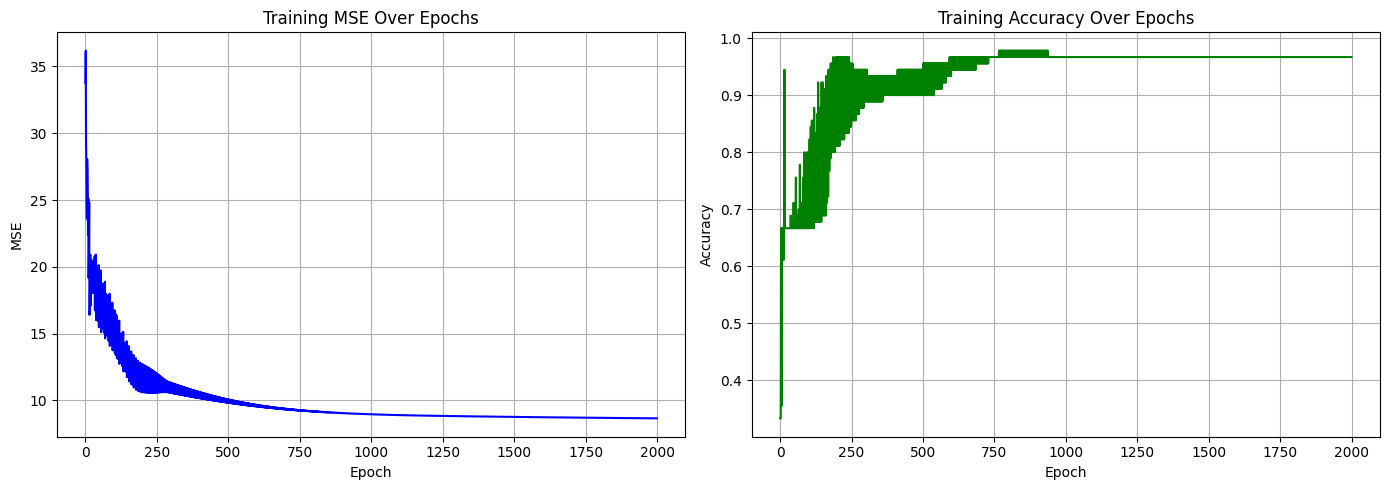

In [1049]:
#Training the classifier using the train set

from logistic_regression import train_linear_classifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

X_train = train_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y_train = train_df['class'].values
print("Unique classes:", np.unique(y_train))

# Ensure y_train is a numpy array and reshaped to 2D
y_train = np.array(y_train).reshape(-1, 1)

# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False, categories='auto')

# Fit and transform
y_train_encoded = encoder.fit_transform(y_train)

num_iterations = 2000
W_train, mse_results, error_rates, train_accuracies, confusion_matrices_train = train_linear_classifier(X_train, y_train_encoded, max_iter=num_iterations, alpha=0.01)
epoch_list=np.arange(0, num_iterations, 1)
print(f"MSE result: {mse_results[-1]}")
print(f"Accuracy result: {train_accuracies[-1]}")

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# MSE Plot
axs[0].plot(epoch_list, mse_results, color='blue')
axs[0].set_title("Training MSE Over Epochs")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("MSE")
axs[0].grid(True)

# Accuracy Plot
axs[1].plot(epoch_list, train_accuracies, color='green')
axs[1].set_title("Training Accuracy Over Epochs")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Accuracy")
axs[1].grid(True)

plt.tight_layout()
plt.show()

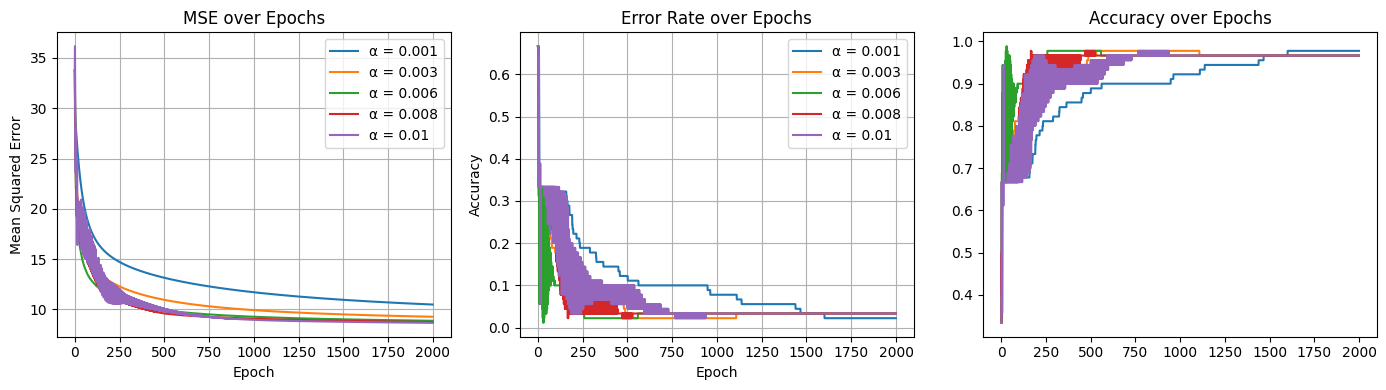

In [1050]:
#Testing for different values of alpha

alphas = [0.001, 0.003, 0.006, 0.008, 0.01]

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))

for a in alphas:
    _, mse_results_a, error_rates_a, train_acc_a, _ = train_linear_classifier(X_train, y_train_encoded, max_iter=num_iterations, alpha=a)
    
    ax1.plot(epoch_list, mse_results_a, label=f"α = {a}")
    ax2.plot(epoch_list, error_rates_a, label=f"α = {a}")
    ax3.plot(epoch_list, train_acc_a, label=f"α = {a}")

# MSE subplot
ax1.set_title("MSE over Epochs")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Mean Squared Error")
ax1.grid(True)
ax1.legend()

# Error Rate subplot
ax2.set_title("Error Rate over Epochs")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Error Rate")
ax2.grid(True)
ax2.legend()

# Accuracy subplot
ax3.set_title("Accuracy over Epochs")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

In [1051]:
#Predicting using the test set
from logistic_regression import predict

X_test = test_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y_test = test_df['class'].values - 1

y_test_encoded = encoder.fit_transform(y_test.reshape(-1, 1))
predictions = predict(X_test, W_train)
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


### 1.c Error rate

Average error rate: 0.06561111111111112


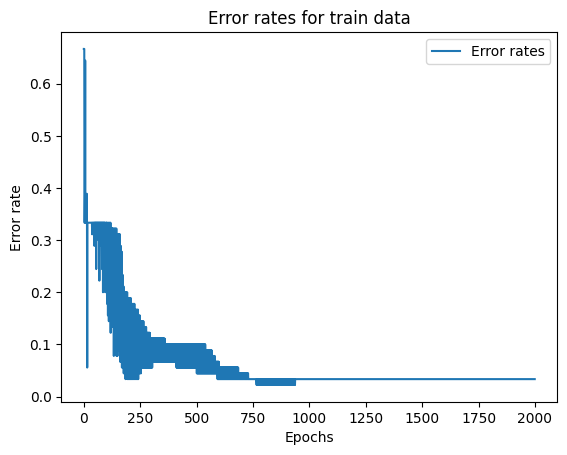

In [1052]:
# Error rate for train data
avg_error_rate = np.mean(error_rates)
print(f"Average error rate: {avg_error_rate}")
plt.plot(epoch_list, error_rates, label= "Error rates")
plt.plot()
plt.title('Error rates for train data')
plt.xlabel('Epochs')
plt.ylabel('Error rate')
plt.legend()
plt.show()

In [1053]:
from logistic_regression import get_error_rate
# Error rate for test data

error_rate_test = get_error_rate(y_test, predictions)
print(error_rate_test)

0.03333333333333333


### 1.c Confusion matrix

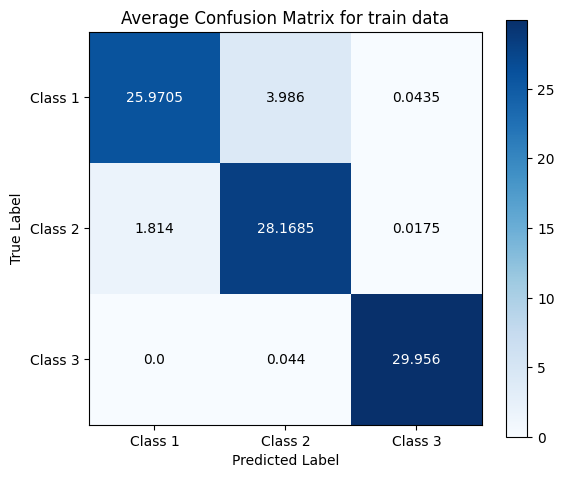

In [1054]:
from confusion_matrix import get_confusion_matrix, plot_cm

# Confusion matrix for train data
avg_cm = sum(confusion_matrices_train) / num_iterations
class_names = ["Class 1", "Class 2", "Class 3"]
plot_cm(avg_cm, class_names, title="Average Confusion Matrix for train data")

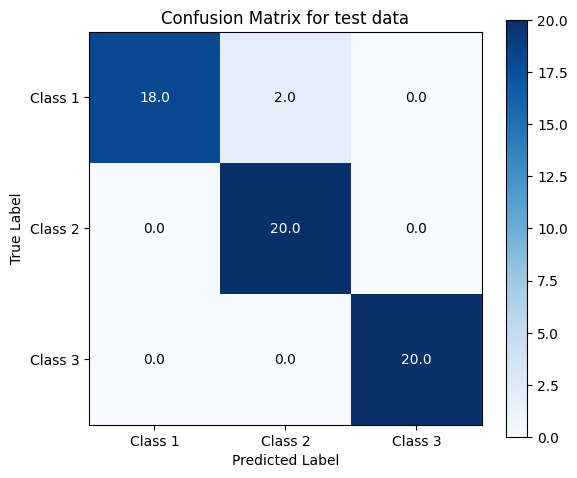

In [1055]:
# Confusion matrix for test data
conf_matrix_test = get_confusion_matrix(y_test, predictions)
plot_cm(conf_matrix_test, class_names, title="Confusion Matrix for test data")


# Task 2

### 2.a Histograms

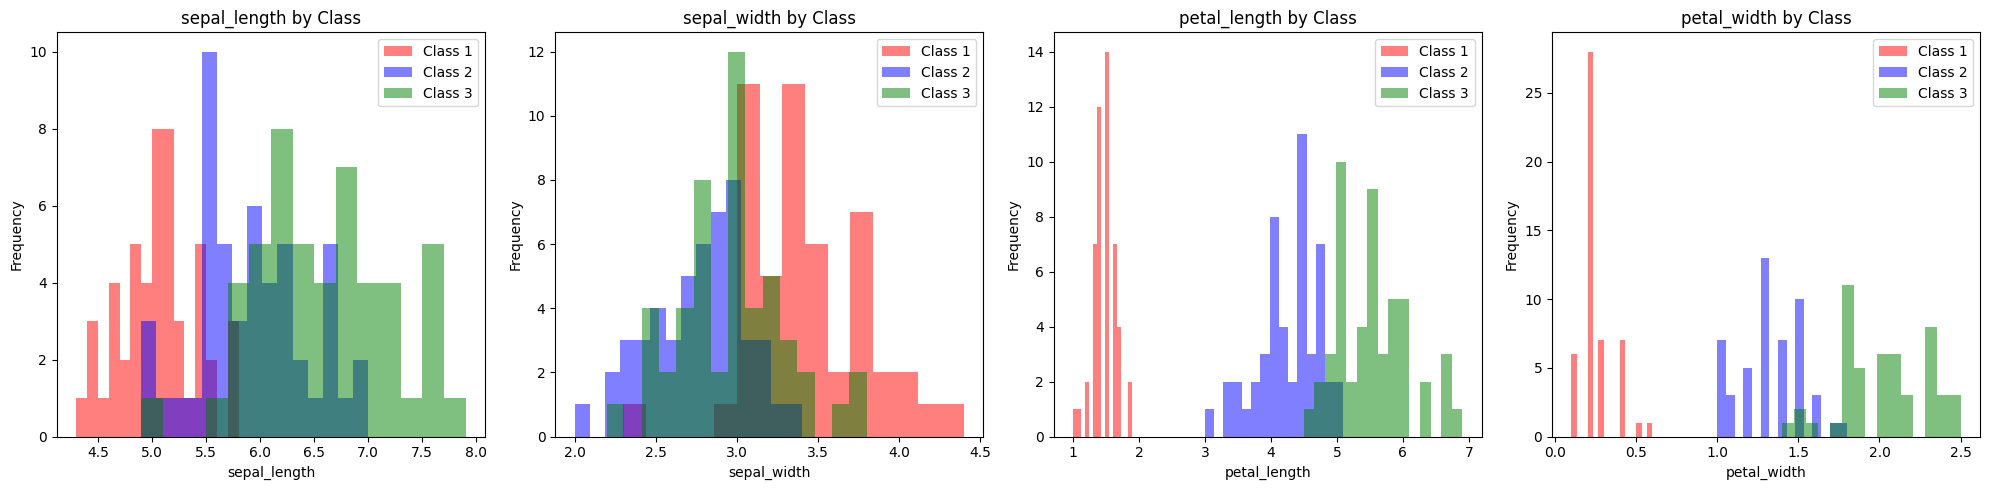

In [1056]:
labels = ['Class 1', 'Class 2', 'Class 3']
colors = ['red', 'blue', 'green']
full_df = pd.concat([df1, df2, df3])

# Creating figure with 1 row and 4 columns
fig, axes = plt.subplots(1, 4, figsize=(20,5))
dataframes = [df1, df2, df3]

for ax, feature in zip(axes, feature_names):
    for cls, col, label in zip(classes, colors, labels):
        subset = full_df[full_df['class'] == cls]
        ax.hist(subset[feature], bins=15, alpha=0.5, color=col, label=label)

    ax.set_title(f'{feature} by Class')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()